In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [3]:
#Load the data

In [4]:
raw_data = pd.read_csv('14 Project practice cas sales.csv')
raw_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
#Preprocessing

In [6]:
raw_data.describe(include='all')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Dodge,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/5/2012,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN,60.407707
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN,72.030917
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN,89.414878


In [7]:
data = raw_data.drop(['Model', '__year_resale_value', 'Curb_weight', 'Latest_Launch'], axis=1)
data.describe(include='all')

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157,157.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,154.000000,155.000000
unique,30,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dodge,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.998076,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,17.951923,23.844156,77.043591
std,NaN,68.029422,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,3.887921,4.282706,25.142664
min,NaN,0.110000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,NaN,14.114000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,15.800000,21.000000,60.407707
50%,NaN,29.450000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,17.200000,24.000000,72.030917
75%,NaN,67.956000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,19.575000,26.000000,89.414878


In [8]:
## The idea is predict the car sales

In [9]:
#search missing values

In [11]:
data.isnull().sum()

Manufacturer          0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [12]:
#Remove missing values from dataset

In [13]:
data_no_mv = data.dropna(axis=0)

In [15]:
data_no_mv.describe(include='all')

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,153,153.000000,153,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
unique,30,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,53.114523,NaN,27.443869,3.059477,185.398693,107.445098,71.114379,187.150327,17.962745,23.830065,76.958514
std,NaN,68.777786,NaN,14.437836,1.053842,57.103362,7.702135,3.467697,13.474079,3.924851,4.293187,25.294453
min,NaN,0.110000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,NaN,13.798000,NaN,17.890000,2.300000,148.000000,103.000000,68.400000,177.500000,15.800000,21.000000,60.087967
50%,NaN,28.976000,NaN,22.799000,3.000000,175.000000,107.000000,70.400000,186.700000,17.200000,24.000000,71.838039
75%,NaN,67.956000,NaN,31.965000,3.800000,215.000000,112.200000,73.100000,196.100000,19.800000,26.000000,89.427820


In [16]:
#Explore the PDF's

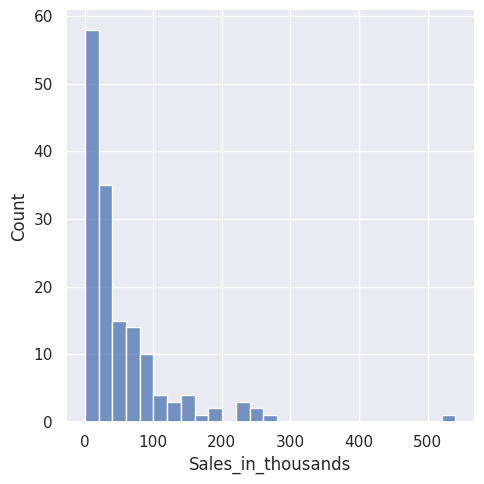

In [17]:
sns.displot(data_no_mv['Sales_in_thousands'])

In [18]:
#Remove outliers

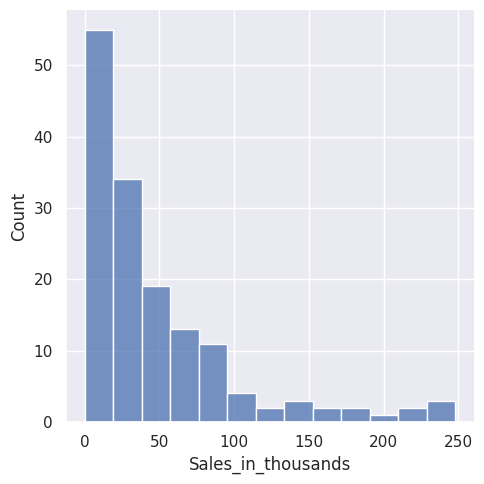

In [19]:
q = data_no_mv['Sales_in_thousands'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Sales_in_thousands']<q]
sns.displot(data_1['Sales_in_thousands'])

In [20]:
data_1.describe(include='all')

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151,151.000000,151,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
unique,30,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dodge,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,NaN,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.405391,NaN,27.417530,3.043046,185.006623,107.211921,71.067550,186.879470,17.895364,23.900662,76.805399
std,NaN,53.419986,NaN,14.529069,1.050429,57.376824,7.315371,3.428169,13.210361,3.899254,4.276689,25.426842
min,NaN,0.110000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,NaN,13.630000,NaN,17.887500,2.300000,147.000000,102.800000,68.350000,177.450000,15.750000,21.000000,59.423108
50%,NaN,27.851000,NaN,22.695000,3.000000,175.000000,107.000000,70.400000,186.600000,17.200000,24.000000,71.191207
75%,NaN,65.905500,NaN,32.542500,3.500000,212.500000,112.200000,73.100000,195.450000,19.450000,26.000000,89.819760


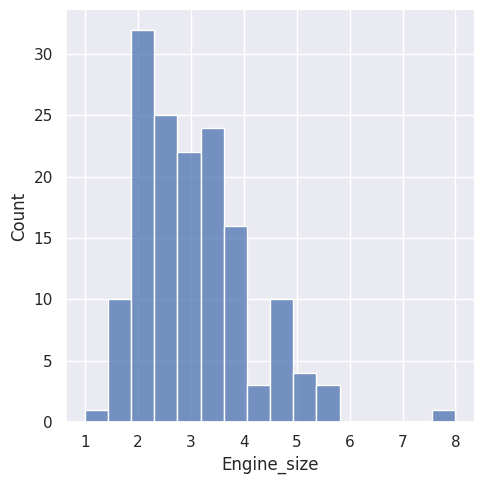

In [22]:
sns.displot(data_1['Engine_size'])

In [23]:
data_2 = data_1[data_1['Engine_size']<6]

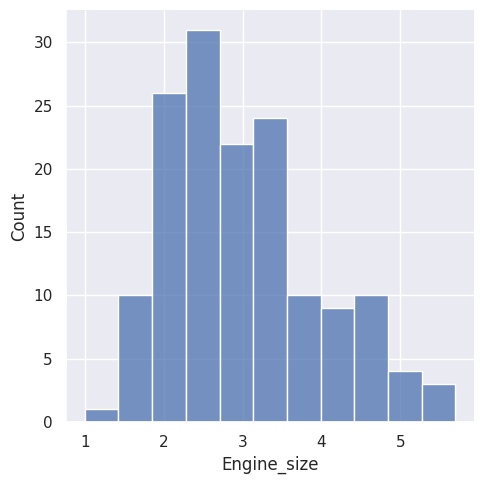

In [24]:
sns.displot(data_2['Engine_size'])

In [25]:
data_2.describe(include='all')

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,150,150.000000,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,30,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.721987,NaN,27.135480,3.010000,183.240000,107.285333,71.036667,186.947333,17.888000,23.953333,76.063139
std,NaN,53.456622,NaN,14.156893,0.972008,53.289469,7.283855,3.418513,13.228182,3.911263,4.241591,23.814107
min,NaN,0.110000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,NaN,13.936250,NaN,17.886250,2.300000,146.500000,103.000000,68.325000,177.525000,15.725000,21.250000,59.090678
50%,NaN,28.413500,NaN,22.650000,3.000000,175.000000,107.000000,70.400000,186.650000,17.200000,24.000000,71.186329
75%,NaN,66.298750,NaN,31.925500,3.500000,210.000000,112.200000,73.100000,195.775000,19.475000,26.000000,88.873615


In [27]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include='all')

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,150,150.000000,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,30,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.721987,NaN,27.135480,3.010000,183.240000,107.285333,71.036667,186.947333,17.888000,23.953333,76.063139
std,NaN,53.456622,NaN,14.156893,0.972008,53.289469,7.283855,3.418513,13.228182,3.911263,4.241591,23.814107
min,NaN,0.110000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,10.300000,15.000000,23.276272
25%,NaN,13.936250,NaN,17.886250,2.300000,146.500000,103.000000,68.325000,177.525000,15.725000,21.250000,59.090678
50%,NaN,28.413500,NaN,22.650000,3.000000,175.000000,107.000000,70.400000,186.650000,17.200000,24.000000,71.186329
75%,NaN,66.298750,NaN,31.925500,3.500000,210.000000,112.200000,73.100000,195.775000,19.475000,26.000000,88.873615


In [30]:
# Checking OLS Assumptions

Text(0.5, 1.0, 'Horsepower and Sales')

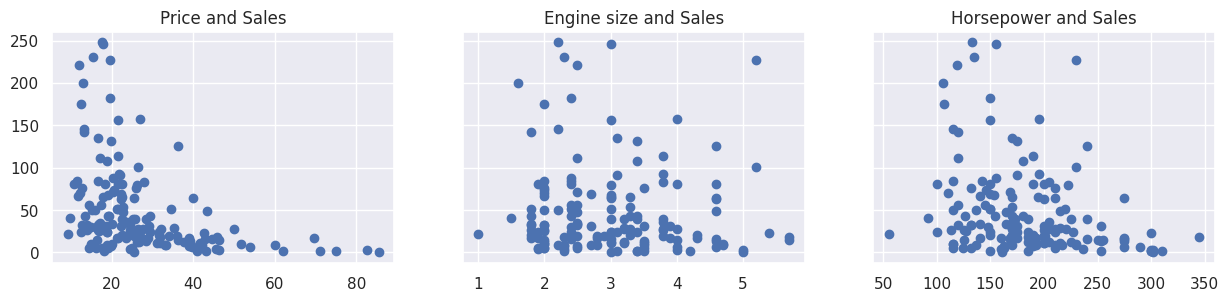

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Price_in_thousands'], data_cleaned['Sales_in_thousands'])
ax1.set_title('Price and Sales')
ax2.scatter(data_cleaned['Engine_size'], data_cleaned['Sales_in_thousands'])
ax2.set_title('Engine size and Sales')
ax3.scatter(data_cleaned['Horsepower'], data_cleaned['Sales_in_thousands'])
ax3.set_title('Horsepower and Sales')

Text(0.5, 1.0, 'Length and Sales')

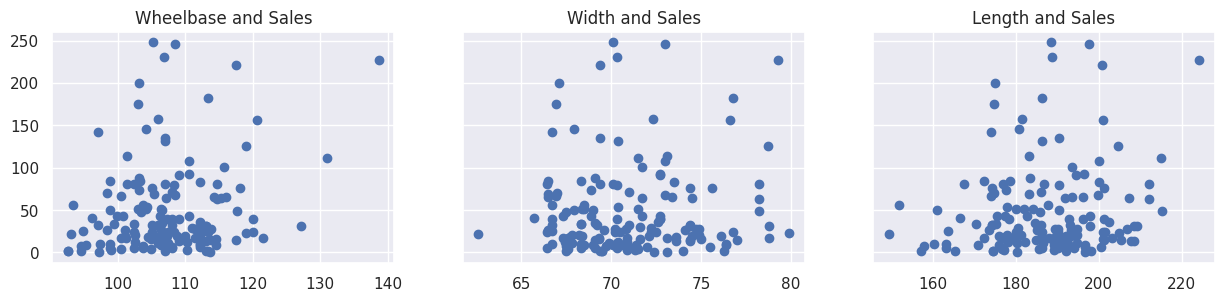

In [36]:
f, (ax4, ax5, ax6) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax4.scatter(data_cleaned['Wheelbase'], data_cleaned['Sales_in_thousands'])
ax4.set_title('Wheelbase and Sales')
ax5.scatter(data_cleaned['Width'], data_cleaned['Sales_in_thousands'])
ax5.set_title('Width and Sales')
ax6.scatter(data_cleaned['Length'], data_cleaned['Sales_in_thousands'])
ax6.set_title('Length and Sales')

Text(0.5, 1.0, 'Power_perf_factor and Sales')

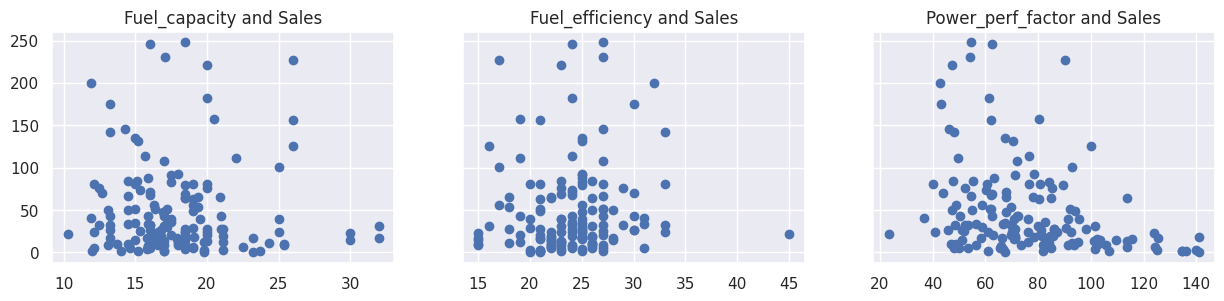

In [35]:
f, (ax7, ax8, ax9) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax7.scatter(data_cleaned['Fuel_capacity'], data_cleaned['Sales_in_thousands'])
ax7.set_title('Fuel_capacity and Sales')
ax8.scatter(data_cleaned['Fuel_efficiency'], data_cleaned['Sales_in_thousands'])
ax8.set_title('Fuel_efficiency and Sales')
ax9.scatter(data_cleaned['Power_perf_factor'], data_cleaned['Sales_in_thousands'])
ax9.set_title('Power_perf_factor and Sales')

In [37]:
#Try to apply log transformation

In [38]:
log_sales = np.log(data_cleaned['Sales_in_thousands'])
data_cleaned['log sales'] = log_sales

Text(0.5, 1.0, 'Horsepower and Log Sales')

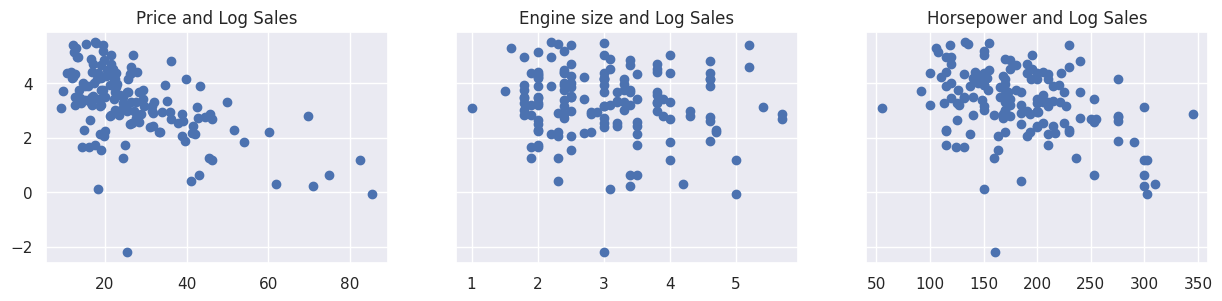

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Price_in_thousands'], data_cleaned['log sales'])
ax1.set_title('Price and Log Sales')
ax2.scatter(data_cleaned['Engine_size'], data_cleaned['log sales'])
ax2.set_title('Engine size and Log Sales')
ax3.scatter(data_cleaned['Horsepower'], data_cleaned['log sales'])
ax3.set_title('Horsepower and Log Sales')

Text(0.5, 1.0, 'Length and Log Sales')

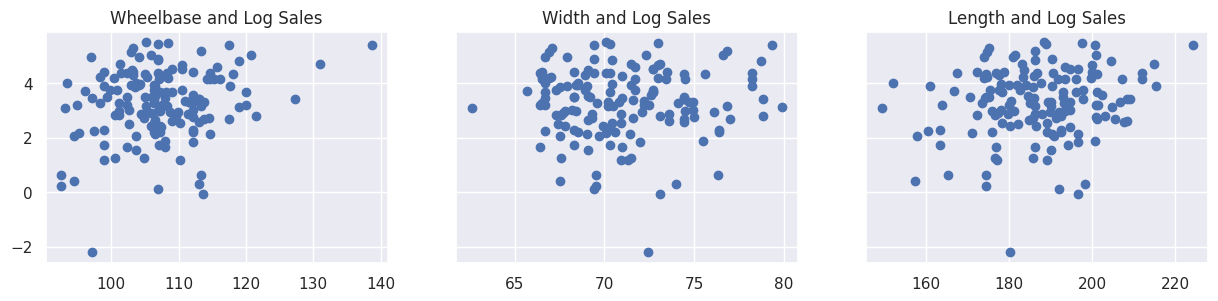

In [40]:
f, (ax4, ax5, ax6) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax4.scatter(data_cleaned['Wheelbase'], data_cleaned['log sales'])
ax4.set_title('Wheelbase and Log Sales')
ax5.scatter(data_cleaned['Width'], data_cleaned['log sales'])
ax5.set_title('Width and Log Sales')
ax6.scatter(data_cleaned['Length'], data_cleaned['log sales'])
ax6.set_title('Length and Log Sales')

Text(0.5, 1.0, 'Power_perf_factor and Sales')

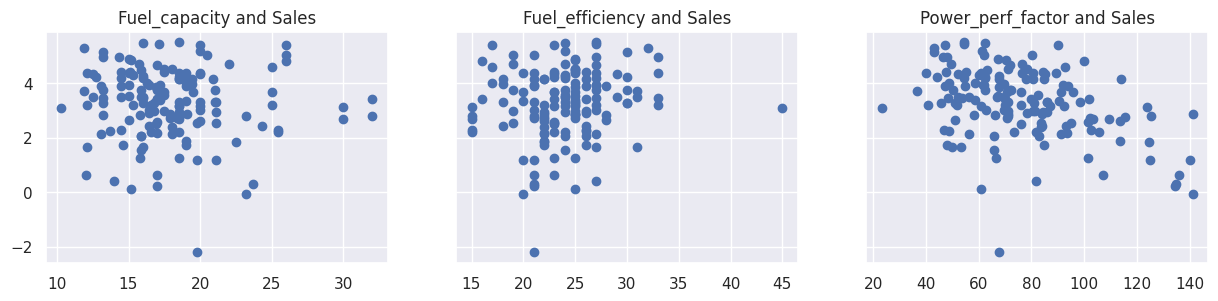

In [41]:
f, (ax7, ax8, ax9) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax7.scatter(data_cleaned['Fuel_capacity'], data_cleaned['log sales'])
ax7.set_title('Fuel_capacity and Sales')
ax8.scatter(data_cleaned['Fuel_efficiency'], data_cleaned['log sales'])
ax8.set_title('Fuel_efficiency and Sales')
ax9.scatter(data_cleaned['Power_perf_factor'], data_cleaned['log sales'])
ax9.set_title('Power_perf_factor and Sales')

In [42]:
data_cleaned.head()

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor,log sales
0,Acura,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,13.2,28.0,58.280150,2.828437
1,Acura,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,17.2,25.0,91.370778,3.673360
2,Acura,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,18.0,22.0,91.389779,2.150366
3,Audi,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,16.4,27.0,62.777639,3.015388
4,Audi,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,18.5,22.0,84.565105,2.932792


In [45]:
data_cleaned.drop(['Manufacturer', 'Engine_size', 'Fuel_efficiency', 'Fuel_capacity', 'Sales_in_thousands'], axis=1)

,Vehicle_type,Price_in_thousands,Horsepower,Wheelbase,Width,Length,Power_perf_factor,log sales
0,Passenger,21.50,140.0,101.2,67.3,172.4,58.280150,2.828437
1,Passenger,28.40,225.0,108.1,70.3,192.9,91.370778,3.673360
2,Passenger,42.00,210.0,114.6,71.4,196.6,91.389779,2.150366
3,Passenger,23.99,150.0,102.6,68.2,178.0,62.777639,3.015388
4,Passenger,33.95,200.0,108.7,76.1,192.0,84.565105,2.932792
...,...,...,...,...,...,...,...,...
145,Passenger,24.40,160.0,100.5,67.6,176.6,66.498812,1.265538
146,Passenger,27.50,168.0,104.9,69.3,185.9,70.654495,2.724252
147,Passenger,28.80,168.0,104.9,69.3,186.2,71.155978,2.863971
148,Passenger,45.50,236.0,104.9,71.5,185.7,101.623357,1.250761


In [46]:
#Dealing multicollinearity

In [49]:
data_cleaned.columns.values

array(['Manufacturer', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase',
       'Width', 'Length', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor', 'log sales'], dtype=object)

In [50]:
#Use VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Price_in_thousands', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Power_perf_factor']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,7006.861788,Price_in_thousands
1,238510.417495,Horsepower
2,794.832886,Wheelbase
3,521.765254,Width
4,808.742515,Length
5,324407.790041,Power_perf_factor


In [57]:
#VIF > 10 so, linear regression cannot apllied in this dataset for predict sales